In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the dataset into python environment


In [71]:
data1 = pd.read_csv("/content/titanic_dataset (1).csv")
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


2. Make ‘PassengerId’ as the index column


In [ ]:
data1= pd.read_csv("/content/titanic_dataset (1).csv",index_col = 'PassengerId')


In [ ]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. Check the basic details of the dataset


In [ ]:
data1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data1.isna().sum() ##check null values

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

4. Fill in all the missing values present in all the columns in the dataset


In [ ]:
num_cols=data1[['Age','Cabin','Embarked']]

In [ ]:
num_cols.isna().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer


In [ ]:
## using stratergy most frequent in simple imputer function handling  missing null values
imputer =SimpleImputer(missing_values =np.nan,strategy='most_frequent')

In [ ]:
imputer = imputer.fit(num_cols) ##fit simple imputer functio 

In [ ]:
num_cols = imputer.transform(num_cols) ## transform all data (null) in the 

In [ ]:
type(num_cols)

numpy.ndarray

In [ ]:
num_cols= pd.DataFrame(num_cols,columns=['Age','Cabin','Embarked'])

In [ ]:
type(num_cols)

pandas.core.frame.DataFrame

In [ ]:
num_cols.isna().sum()

Age         0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
data1 =data1.drop(['Age','Cabin','Embarked'],axis=1)

In [ ]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


In [ ]:
data1=pd.concat([num_cols,data1],axis=1)

In [ ]:
data1.head()

,Age,Cabin,Embarked,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,22.0,B96 B98,S,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,38.0,C85,C,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,26.0,B96 B98,S,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,35.0,C123,S,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,35.0,B96 B98,S,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


In [ ]:
data1.isna().sum()

Age            0
Cabin          0
Embarked       0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

5. Check and handle outliers in at least 3 columns in the dataset


Text(0.5, 1.0, 'AGE')

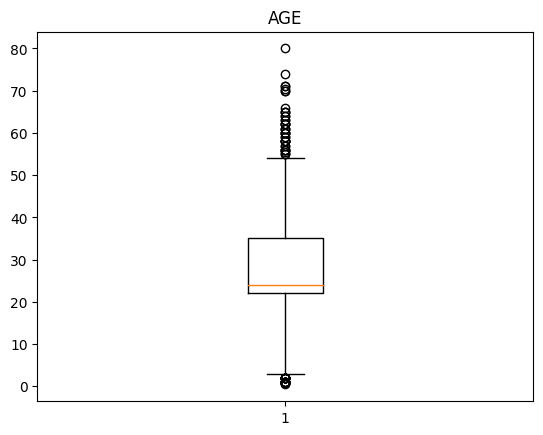

In [ ]:

plt.boxplot(data1['Age'])
plt.title('AGE')

In [ ]:
Q1 =np.percentile(data1['Age'],25)
Q1

22.0

In [ ]:
Q2 =np.percentile(data1['Age'],50)
Q2

24.0

In [ ]:
Q3 =np.percentile(data1['Age'],75)
Q3

35.0

In [ ]:
IQR =Q3-Q1
IQR

13.0

In [ ]:
low_limit=Q1-1.5*IQR
upr_limit=Q3+1.5*IQR

In [ ]:
low_limit

2.5

In [ ]:
upr_limit

54.5

In [ ]:
outlier =[]
for x in data1['Age']:
    if x>upr_limit or x<low_limit:
      outlier.append(x)

In [ ]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [ ]:
ind =data1['Age']>upr_limit
data1.loc[ind].index

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [ ]:
data1.drop([11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],inplace = True)

In [ ]:
data1.shape

(849, 12)

Text(0.5, 1.0, 'Pclass')

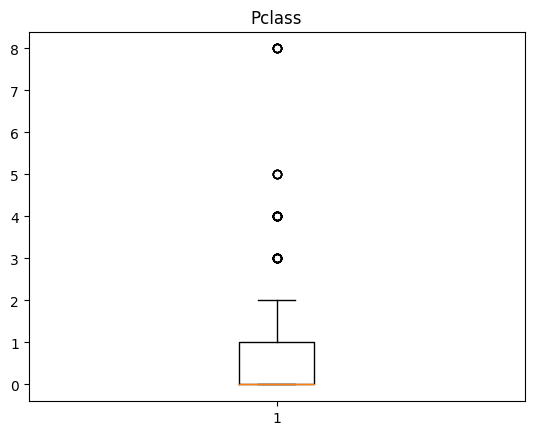

In [ ]:
plt.boxplot(data1['SibSp'])
plt.title('SibSp')

In [ ]:
Q1 = np.percentile(data1['SibSp'],25)
Q1

0.0

In [ ]:
Q2 = np.percentile(data1['SibSp'],50)
Q2

0.0

In [ ]:
Q3 = np.percentile(data1['SibSp'],75)
Q3

1.0

In [ ]:
IQR=Q3-Q1
IQR

1.0

In [ ]:
low_limit=Q1-1.5*IQR
upr_limit=Q3+1.5*IQR

In [ ]:
low_limit

-1.5

In [ ]:
upr_limit

2.5

In [ ]:
outlier=[]
for x in data1['SibSp']:
  if x>upr_limit or x<low_limit:
          outlier.append(x)

In [ ]:
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [ ]:
ind =data1['SibSp']>upr_limit
data1.loc[ind].index

Int64Index([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],
           dtype='int64')

In [ ]:
data1.drop([7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],inplace = True)

In [ ]:
data1.shape

(803, 12)

Text(0.5, 1.0, 'Parch')

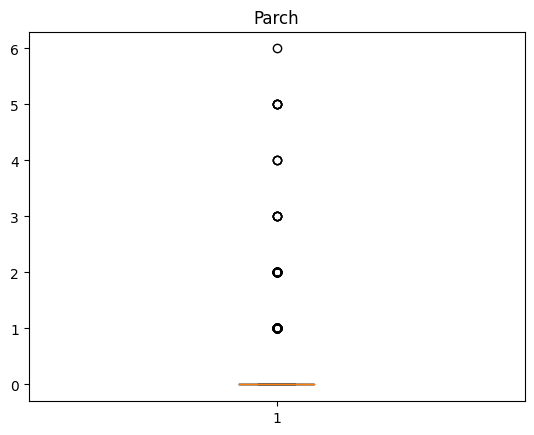

In [ ]:
plt.boxplot(data1['Fare'])
plt.title('Fare')

In [ ]:
Q1 = np.percentile(data1['Fare'],25)
Q1

7.8958

In [ ]:
Q2 = np.percentile(data1['Fare'],50)
Q2

13.0

In [ ]:
Q3 = np.percentile(data1['Fare'],75)
Q3

27.825

In [ ]:
IQR=Q3-Q1
IQR

19.929199999999998

In [ ]:
low_limit=Q1-1.5*IQR
upr_limit=Q3+1.5*IQR

In [ ]:
low_limit

-21.997999999999998

In [ ]:
upr_limit

57.7188

In [ ]:
outlier=[]
for x in data1['Fare']:
  if x>upr_limit or x<low_limit:
          outlier.append(x)

In [ ]:
outlier

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 61.175,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 61.3792,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 57.9792,
 153.4625,
 133.65,
 66.6,
 134.5,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 59.4,
 93.5,
 57.9792,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 83.1583,
 89.1042,
 164.8667]

In [ ]:
ind =data1['Fare']>upr_limit
data1.loc[ind].index

Int64Index([  1,  31,  34,  52,  61,  62,  72,  92,  97, 102,
            ...
            759, 763, 765, 779, 789, 802, 820, 835, 849, 856],
           dtype='int64', length=104)

In [ ]:
data1.drop([1,  31,  34,  52,  61,  62,  72,  92,  97, 102,
            759, 763, 765, 779, 789, 802, 820, 835, 849, 856],inplace=True)

In [ ]:
data1.shape

(783, 12)

6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [130]:
x = data1.drop('Survived',axis = 1)##independet

In [131]:
y = data1['Survived']##depented

In [132]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [133]:
x=x.drop("Sex",axis =1)

In [134]:
x=x.drop("Ticket",axis =1)

In [135]:
x=x.drop("Embarked",axis =1)

In [136]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() ## encoding string to numerical pattern
x['Name'] =le.fit_transform(x['Name'])
x

,PassengerId,Pclass,Name,Age,SibSp,Parch,Fare,Cabin
0,1,3,108,22.0,1,0,7.2500,NaN
1,2,1,190,38.0,1,0,71.2833,C85
2,3,3,353,26.0,0,0,7.9250,NaN
3,4,1,272,35.0,1,0,53.1000,C123
4,5,3,15,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...
886,887,2,548,27.0,0,0,13.0000,NaN
887,888,1,303,19.0,0,0,30.0000,B42
888,889,3,413,NaN,1,2,23.4500,NaN
889,890,1,81,26.0,0,0,30.0000,C148


In [137]:
x['Name'] =le.fit_transform(x['Name'])
x

,PassengerId,Pclass,Name,Age,SibSp,Parch,Fare,Cabin
0,1,3,108,22.0,1,0,7.2500,NaN
1,2,1,190,38.0,1,0,71.2833,C85
2,3,3,353,26.0,0,0,7.9250,NaN
3,4,1,272,35.0,1,0,53.1000,C123
4,5,3,15,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...
886,887,2,548,27.0,0,0,13.0000,NaN
887,888,1,303,19.0,0,0,30.0000,B42
888,889,3,413,NaN,1,2,23.4500,NaN
889,890,1,81,26.0,0,0,30.0000,C148


In [138]:
x1=x.drop('Name',axis =1)
x1

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,3,22.0,1,0,7.2500,NaN
1,2,1,38.0,1,0,71.2833,C85
2,3,3,26.0,0,0,7.9250,NaN
3,4,1,35.0,1,0,53.1000,C123
4,5,3,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,NaN
887,888,1,19.0,0,0,30.0000,B42
888,889,3,NaN,1,2,23.4500,NaN
889,890,1,26.0,0,0,30.0000,C148


In [139]:
x['Cabin'] =le.fit_transform(x['Cabin'])
x

,PassengerId,Pclass,Name,Age,SibSp,Parch,Fare,Cabin
0,1,3,108,22.0,1,0,7.2500,147
1,2,1,190,38.0,1,0,71.2833,81
2,3,3,353,26.0,0,0,7.9250,147
3,4,1,272,35.0,1,0,53.1000,55
4,5,3,15,35.0,0,0,8.0500,147
...,...,...,...,...,...,...,...,...
886,887,2,548,27.0,0,0,13.0000,147
887,888,1,303,19.0,0,0,30.0000,30
888,889,3,413,NaN,1,2,23.4500,147
889,890,1,81,26.0,0,0,30.0000,60


In [140]:
x1=x.drop('Cabin',axis =1)

In [141]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [142]:
min_max=MinMaxScaler(feature_range=(0,1))
x1=min_max.fit_transform(x1)

In [143]:
type(x1)

numpy.ndarray

In [144]:
x1=pd.DataFrame(x1)

In [145]:
type(x1)

pandas.core.frame.DataFrame

In [146]:
x1.describe()

,0,1,2,3,4,5,6
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.500000,0.654321,0.500000,0.367921,0.065376,0.063599,0.062858
std,0.289162,0.418036,0.289162,0.182540,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.500000,0.250000,0.247612,0.000000,0.000000,0.015440
50%,0.500000,1.000000,0.500000,0.346569,0.000000,0.000000,0.028213
75%,0.750000,1.000000,0.750000,0.472229,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
x=x.drop(['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin'],axis =1)

In [148]:
x=pd.concat([x,x1],axis =1)

In [129]:
x.head()

,0,1,2,3,4,5,6,0,1,2,3,4,5,6
0,0.000000,1.0,0.121348,0.271174,0.125,0.0,0.014151,0.000000,1.0,0.121348,0.271174,0.125,0.0,0.014151
1,0.001124,0.0,0.213483,0.472229,0.125,0.0,0.139136,0.001124,0.0,0.213483,0.472229,0.125,0.0,0.139136
2,0.002247,1.0,0.396629,0.321438,0.000,0.0,0.015469,0.002247,1.0,0.396629,0.321438,0.000,0.0,0.015469
3,0.003371,0.0,0.305618,0.434531,0.125,0.0,0.103644,0.003371,0.0,0.305618,0.434531,0.125,0.0,0.103644
4,0.004494,1.0,0.016854,0.434531,0.000,0.0,0.015713,0.004494,1.0,0.016854,0.434531,0.000,0.0,0.015713
